In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [24]:
num_points = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=num_points, random_state=123, centers=centers, cluster_std=0.4)

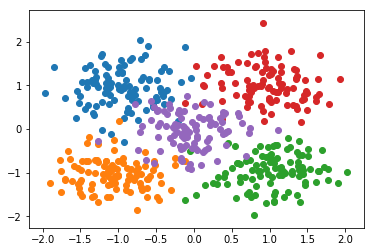

In [25]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [29]:
y_cat = to_categorical(y, 5)
# Value |   Categorical Value
# 0     |    1       0       0
# 1     |    0       1       0
# 1     |    0       0       1 ... identity matrix

In [31]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2, ), activation='softmax'))
adam = Adam(learning_rate=0.1)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
h = model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 144us/step - loss: 1.4303 - accuracy: 0.3840
Epoch 2/100
500/500 [==============================] - 0s 24us/step - loss: 0.6757 - accuracy: 0.8180
Epoch 3/100
500/500 [==============================] - 0s 25us/step - loss: 0.4483 - accuracy: 0.8880
Epoch 4/100
500/500 [==============================] - 0s 26us/step - loss: 0.3546 - accuracy: 0.9460
Epoch 5/100
500/500 [==============================] - 0s 30us/step - loss: 0.3072 - accuracy: 0.9440
Epoch 6/100
500/500 [==============================] - 0s 27us/step - loss: 0.2788 - accuracy: 0.9420
Epoch 7/100
500/500 [==============================] - 0s 22us/step - loss: 0.2605 - accuracy: 0.9400
Epoch 8/100
500/500 [==============================] - 0s 24us/step - loss: 0.2454 - accuracy: 0.9500
Epoch 9/100
500/500 [==============================] - 0s 27us/step - loss: 0.2349 - accuracy: 0.9460
Epoch 10/100
500/500 [==============================] - 0s 25us/step - loss: 0.22

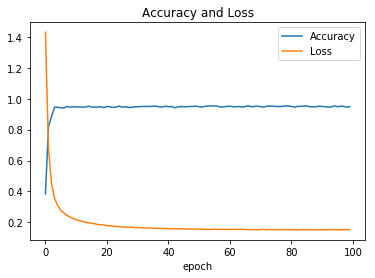

In [33]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.title('Accuracy and Loss')
plt.legend(['Accuracy', 'Loss'])

In [34]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()

    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)
    
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

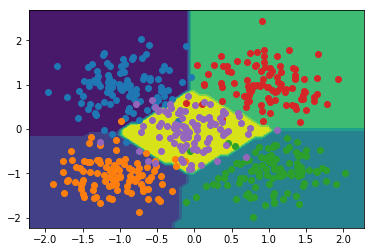

In [36]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

Prediction is:  4


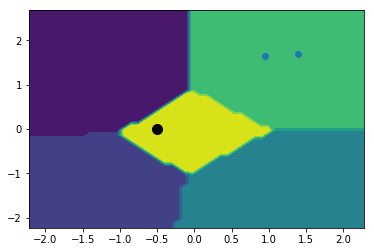

In [41]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

x = -0.5
y = -0
 
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="black")
print "Prediction is: ", prediction[0]